In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix
plt.style.use("fivethirtyeight")
colors = ["Teal","Indigo","HotPink","DarkGoldenRod","Coral"]

Data is prepared as it has been provided by Bülent Esen's notebook https://www.kaggle.com/bulentesen/cardiac-arrythmia-naive-bayes-v2 who is the publisher of the dataset. No further data preparation besides the ones in cell 8 were not pursued since the data preparataion should be at it's best under the owner's own usage.

In [2]:
print(os.listdir('/'))

['$RECYCLE.BIN', 'android-x86-9.0-r2.iso', 'apache-jmeter-5.5', 'Files', 'kali-linux-2022.3-installer-amd64.iso', 'Student-Management-System-in-Python-main', 'System Volume Information', 'Windows10 x64(19045.2075).ISO', 'XuJiantao', '虚拟机VMware 15.5.0', '虚拟机VMware 15.5.0.zip']


Data is a .CSV file which contains all the possible instructions that can be obtained from ECG readings. However some of the columns have unreliable data (nulls and just vectors of singular values to be exact). So the owner of the dataset seems to drop these columns not applying any interpolation implementation. So, this notebook doesn't follow any interpolation measure either.

In [3]:
df = pd.read_csv('data_arrhythmia.csv', delimiter=';')

In [4]:
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [5]:
df.drop(["J","R'_wave","S'_wave", "AB", "AC", "AD","AE", "AF", "AG", "AL", "AN", "AO", "AP", "AR", "AS", "AT", "AZ", "AB'", "BC", "BD", "BE", "BG", "BH", "BP", "BR", "BS", "BT", "BU", 
          "CA", "CD", "CE", "Cf", "CG", "CH", "CI", "CM","CN","CP","CR","CS","CT","CU","CV","DE","DF","DG","DH","DI","DJ","DR","DS","DT","DU","DV","DY","EG",
          "EH", "EL", "ER", "ET", "EU", "EV", "EY", "EZ", "FA", "FE", "FF", "FH", "FI", "FJ", "FK", "FL", "FM", "FR", "FS", "FU", "FV", "FY", "FZ", "GA",
          "GB", "GG", "GH", "HD", "HE", "HO", "IA", "IB", "IK", "IL", "IY", "JI", "JS", "JT", "KF", "KO", "KP", "LB", "LC", "T", "P", "QRST", "heart_rate"], axis=1, inplace=True)

In [6]:
df.head(10)

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KU,KV,KY,KZ,LA,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,62.9,-0.3,0.0,9.0,-0.9,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,43.4,-0.5,0.0,8.5,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,48.2,0.9,0.0,9.5,-2.4,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,68.0,0.1,0.0,12.2,-2.2,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,48.9,-0.4,0.0,13.1,-3.6,-0.1,3.9,25.4,62.8,7
5,13,0,169,51,100,167,321,174,91,107,...,49.1,0.0,-0.6,12.2,-2.8,0.9,2.2,13.5,31.1,14
6,40,1,160,52,77,129,377,133,77,77,...,18.9,-0.4,0.0,6.5,0.0,0.4,1.0,14.3,20.5,1
7,49,1,162,54,78,0,376,157,70,67,...,20.9,-0.3,0.0,8.2,-1.9,0.1,0.5,15.8,19.8,1
8,44,0,168,56,84,118,354,160,63,61,...,48.5,0.1,0.0,7.0,-1.3,0.6,2.1,12.5,30.9,1
9,50,1,167,67,89,130,383,156,73,85,...,29.6,-0.5,-0.6,10.8,-1.7,0.8,0.9,20.1,25.1,10


Further investigating the data have revealed there are some odd entries for the entries that are made presumably for babies which is handled manually. https://www.kaggle.com/mtavares51/binary-classification-on-arrhythmia-dataset

In [7]:
df['height'].value_counts().sort_index()

105     1
110     1
119     1
120     2
124     1
127     1
130     2
132     1
133     1
138     1
140     1
146     1
148     1
149     1
150     9
152     1
153     5
154     4
155    23
156    19
157    10
158     9
159     6
160    81
161     5
162    15
163    16
164     9
165    46
166     9
167     8
168    15
169     7
170    40
171     9
172    14
173     7
174     4
175    21
176    10
177     4
178     9
179     1
180     4
181     1
182     2
184     1
185     3
186     3
188     1
190     3
608     1
780     1
Name: height, dtype: int64

In [8]:
df.loc[df["height"] == 608, "height"] = 61
df.loc[df["height"] == 780, "height"] = 78
df['height'].value_counts().sort_index()

61      1
78      1
105     1
110     1
119     1
120     2
124     1
127     1
130     2
132     1
133     1
138     1
140     1
146     1
148     1
149     1
150     9
152     1
153     5
154     4
155    23
156    19
157    10
158     9
159     6
160    81
161     5
162    15
163    16
164     9
165    46
166     9
167     8
168    15
169     7
170    40
171     9
172    14
173     7
174     4
175    21
176    10
177     4
178     9
179     1
180     4
181     1
182     2
184     1
185     3
186     3
188     1
190     3
Name: height, dtype: int64

In [9]:
norm_risk_list = []
for diagnose in df.diagnosis:
    if diagnose == 1:
        norm_risk_list.append(True)
    else:
        norm_risk_list.append(False)
df["label"] = np.array(norm_risk_list)
df.drop(columns = ["diagnosis"],inplace = True)
df.label.value_counts()

True     245
False    207
Name: label, dtype: int64

X is formed by importing every data at first. All the dimensionality reduction will be applied afterwards. Y is the label column.

In [10]:
X = df.drop(columns = [df.columns[-1]])
y = df[df.columns[-1]]
print(X.shape)
print(y.shape)

(452, 176)
(452,)


A train test split have been implemented with 0.2 test_size value.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(361, 176)
(361,)
(91, 176)
(91,)


For every column, a MinMaxScaler have been implemented

In [12]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = X_train_scaled
X_test = X_test_scaled

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

# 定义基学习器
knn = KNeighborsClassifier()
svm = SVC()
rf = RandomForestClassifier()

# Create a stacking classifier
stacking = StackingClassifier(estimators=[('knn', knn), ('svm', svm), ('rf', rf)], final_estimator=SVC())

# Define the parameter grid
param_grid = {'knn__n_neighbors': [3, 5, 7,10,15,20,25,30,35,40],
              'svm__C': [1,5,10,14,17,20,23,26,30],
              'rf__n_estimators': [8,12,16,21,26,30,35],
              'final_estimator__C': [1,5,10,15,20,25]}

# Create the grid search object
grid_search = GridSearchCV(stacking, param_grid, cv=5, return_train_score=True)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print('Best Parameters: ', grid_search.best_params_)

# Predict the test set
y_pred = grid_search.predict(X_test)

# Print the accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

Best Parameters:  {'final_estimator__C': 15, 'knn__n_neighbors': 10, 'rf__n_estimators': 12, 'svm__C': 1}
Accuracy:  0.7692307692307693


In [16]:
print("Prediction:", grid_search.predict(scaler.transform([[55,0,175,94,100,202,380,179,143,28,0,72,20,48,0,64,36,0,36,20,52,48,56,0,64,32,0,0,0,72,0,0,60,12,0,44,0,60,44,32,56,0,0,0,0,0,0,40,44,0,0,20,0,52,40,0,0,32,0,0,0,0,56,48,0,36,0,60,48,36,0,64,40,40,0.9,0.0,7.8,-0.7,1.1,1.9,27.3,45.1,0.1,0.0,9.1,-2.6,0.0,0.0,0.4,1.5,24.5,36.8,-0.4,-0.4,1.6,-2.2,-1.0,-0.9,-1.5,-9.2,-0.4,-8.2,1.8,0.0,0.0,-0.7,-1.7,-23.4,-35.6,0.9,0.0,3.2,-0.4,0.7,1.2,9.4,18.0,-0.1,0.0,5.1,-2.5,0.3,0.6,9.8,12.6,1.6,-6.5,0.0,0.0,0.0,-0.4,-0.4,-18.2,-22.4,2.1,0.0,1.2,-6.9,0.0,-0.5,2.9,-12.7,18.0,0.7,0.0,9.0,-7.9,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.4,2.6,34.6,61.6]])))

Prediction: [ True]


D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [14]:
# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', conf_mat)

# Plot the confusion matrix
plt.imshow(conf_mat, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Confusion matrix: [[33  9]
 [12 37]]


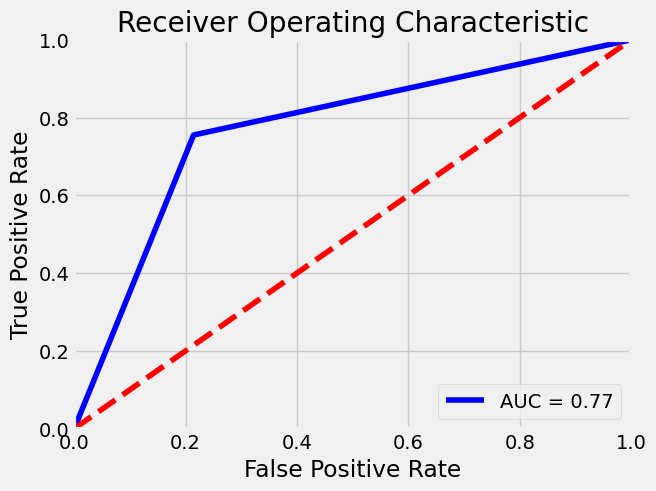

In [15]:
from sklearn.metrics import auc
#ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()